In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df=pd.read_csv("plant_disease_dataset.csv")

In [17]:
df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [18]:
df.tail()

,temperature,humidity,rainfall,soil_pH,disease_present
9995,31.505510,81.939137,22.406822,5.862952,1
9996,15.008275,86.886833,10.503881,4.070539,0
9997,21.473416,81.891770,13.426869,7.101583,0
9998,27.478828,88.567649,9.719659,7.732620,0
9999,28.221942,71.900401,4.886391,4.383536,0


In [19]:
df.isnull().sum()

temperature        0
humidity           0
rainfall           0
soil_pH            0
disease_present    0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


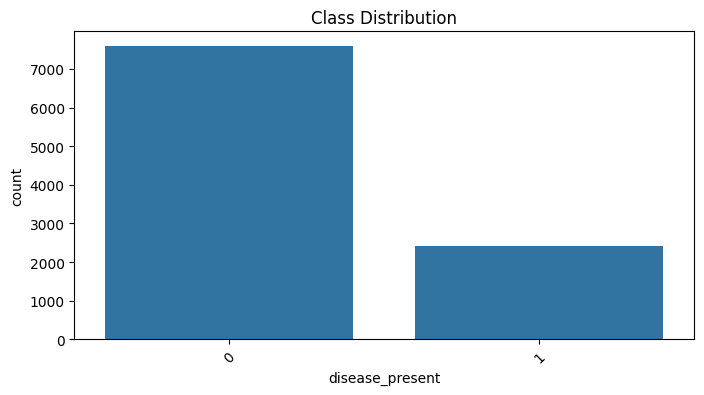

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x='disease_present', data=df)
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

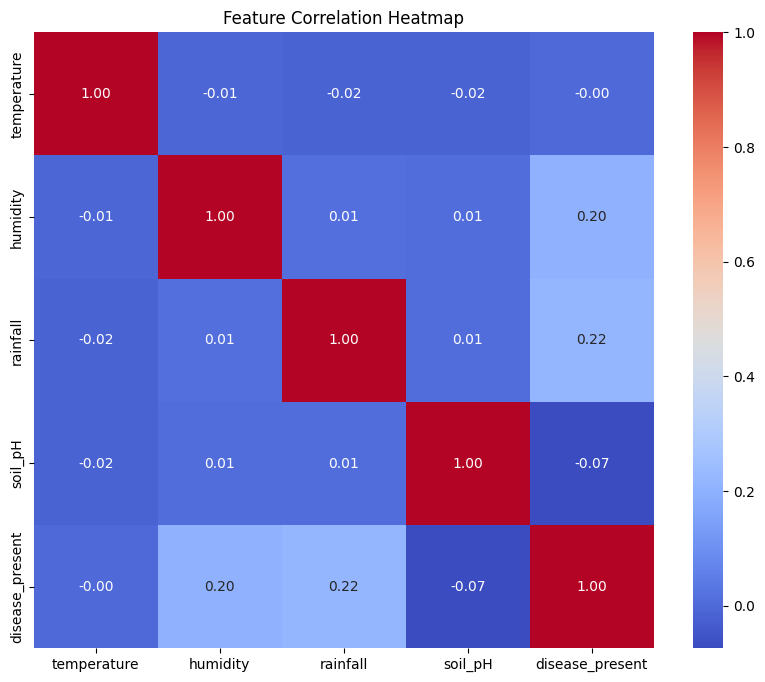

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [30]:
X = df.drop("disease_present", axis=1)
y = df["disease_present"]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
clf= RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = clf.predict(x_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8595
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1518
           1       0.79      0.57      0.66       482

    accuracy                           0.86      2000
   macro avg       0.83      0.76      0.79      2000
weighted avg       0.85      0.86      0.85      2000



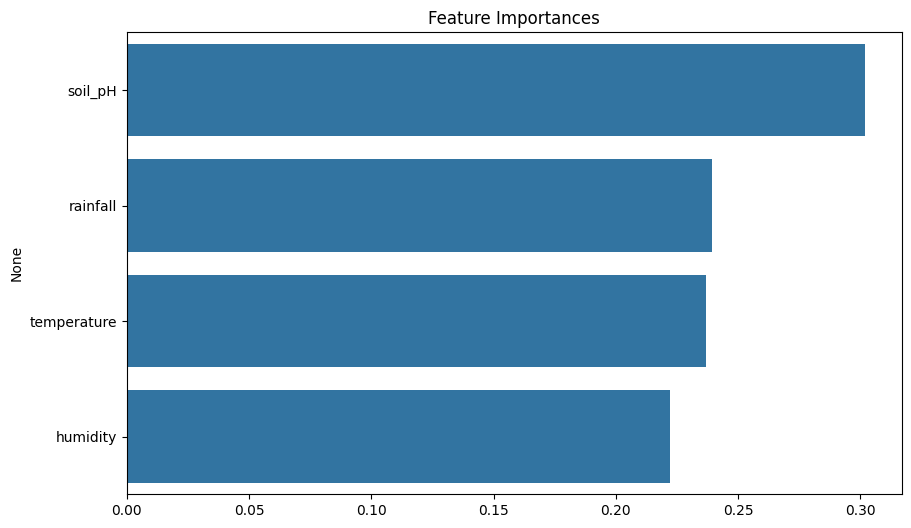

In [37]:
importances = clf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feat_names[indices])
plt.title('Feature Importances')
plt.show()